In [1]:
import pandas as pd


In [7]:
with open('One.txt') as f1:
    one_text=f1.read().lower().split()
uni_words_one=set(one_text)

In [8]:
with open('Two.txt') as f2:
    two_text=f2.read().lower().split()
uni_words_two=set(two_text)


In [9]:
uni_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [16]:
all_uni_words=set()
all_uni_words.update(uni_words_one)
all_uni_words.update(uni_words_two)

In [19]:
all_uni_words
full_vocab=dict()
i=0
for words in all_uni_words:
    full_vocab[words]=i
    i+=1

In [20]:
full_vocab

{'water': 0,
 'this': 1,
 'furry': 2,
 'canine': 3,
 'pets': 4,
 'animals': 5,
 'sport': 6,
 'dogs': 7,
 'about': 8,
 'our': 9,
 'waves': 10,
 'surfing': 11,
 'catching': 12,
 'is': 13,
 'fun': 14,
 'are': 15,
 'a': 16,
 'popular': 17,
 'story': 18}

In [21]:
one_freq=[0]*len(full_vocab)
two_freq=[0]*len(full_vocab)
all_words=['']*len(full_vocab)

In [23]:
for word in full_vocab:
    word_index=full_vocab[word]
    all_words[word_index]=word

In [24]:
all_words

['water',
 'this',
 'furry',
 'canine',
 'pets',
 'animals',
 'sport',
 'dogs',
 'about',
 'our',
 'waves',
 'surfing',
 'catching',
 'is',
 'fun',
 'are',
 'a',
 'popular',
 'story']

In [27]:
with open('One.txt') as f1:
    one_text=f1.read().lower().split()
    word_index=full_vocab[word]
    one_freq[word_index]+=1

In [28]:
with open('Two.txt') as f2:
    two_text=f2.read().lower().split()
    word_index=full_vocab[word]
    two_freq[word_index]+=1

In [29]:
import pandas as pd

In [31]:
bow=pd.DataFrame(data=[one_freq,two_freq],columns=all_words)
bow

,water,this,furry,canine,pets,animals,sport,dogs,about,our,waves,surfing,catching,is,fun,are,a,popular,story
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# using sklearn

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
text=[
    'this is it',
    'hello hi ',
    'nothing matters anymore'
]

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv=CountVectorizer()

In [37]:
sparse_matrix=cv.fit_transform(text)

In [40]:
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 0, 0, 1],
        [0, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [48]:
cv.vocabulary_

{'this': 7,
 'is': 3,
 'it': 4,
 'hello': 1,
 'hi': 2,
 'nothing': 6,
 'matters': 5,
 'anymore': 0}

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tv=TfidfVectorizer()
sparse_matrix=tv.fit_transform(text)

In [53]:
sparse_matrix.todense()

matrix([[0.        , 0.        , 0.        , 0.57735027, 0.57735027,
         0.        , 0.        , 0.57735027],
        [0.        , 0.70710678, 0.70710678, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.57735027, 0.        , 0.        , 0.        , 0.        ,
         0.57735027, 0.57735027, 0.        ]])

# NLP

In [54]:
df=pd.read_csv('../DATA/airline_tweets.csv')

In [55]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

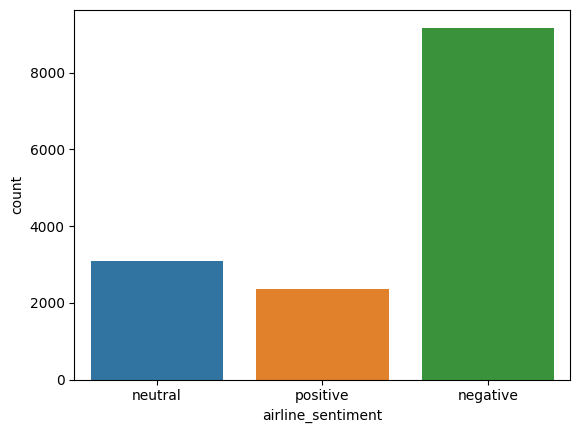

In [57]:
sns.countplot(data=df,x='airline_sentiment')

<Axes: xlabel='negativereason', ylabel='count'>

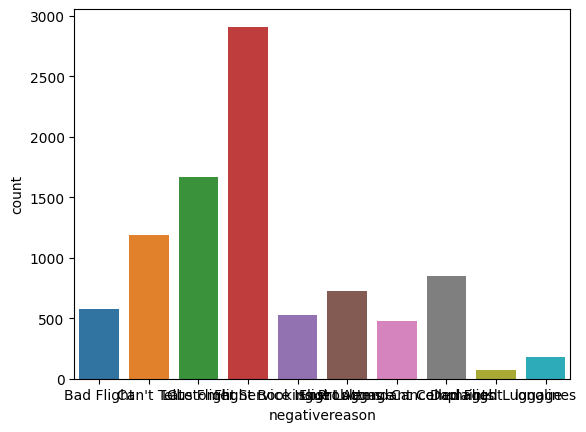

In [58]:
sns.countplot(data=df,x='negativereason')

In [60]:
data=df[['airline_sentiment','text']]

In [61]:
X=data['airline_sentiment']
y=data['text']

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [67]:
tfidf=TfidfVectorizer()

In [69]:
tfidf.fit(X_train)

TfidfVectorizer()

In [71]:
X_train_tfidf=tfidf.transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [73]:
X_train_tfidf

<9808x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9808 stored elements in Compressed Sparse Row format>

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC

In [77]:
nb=MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [81]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)